In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amalanfadilgaib","key":"009d19b37f6836ed0722d9a7a24b5ea2"}'}

In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d warcoder/tyre-quality-classification

 99% 2.64G/2.66G [00:30<00:00, 79.8MB/s]
100% 2.66G/2.66G [00:30<00:00, 93.0MB/s]


In [4]:
!unzip '/content/tyre-quality-classification.zip'

Archive:  /content/tyre-quality-classification.zip
  inflating: Digital images of defective and good condition tyres/defective/Defective (1).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (10).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (100).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (1000).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (1001).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (1002).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (1003).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (1004).jpg  
  inflating: Digital images of defective and good condition tyres/defective/Defective (1005).jpg  
  inflating: Digital images of defective and good condition tyre

In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [6]:
data = '/content/Digital images of defective and good condition tyres'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

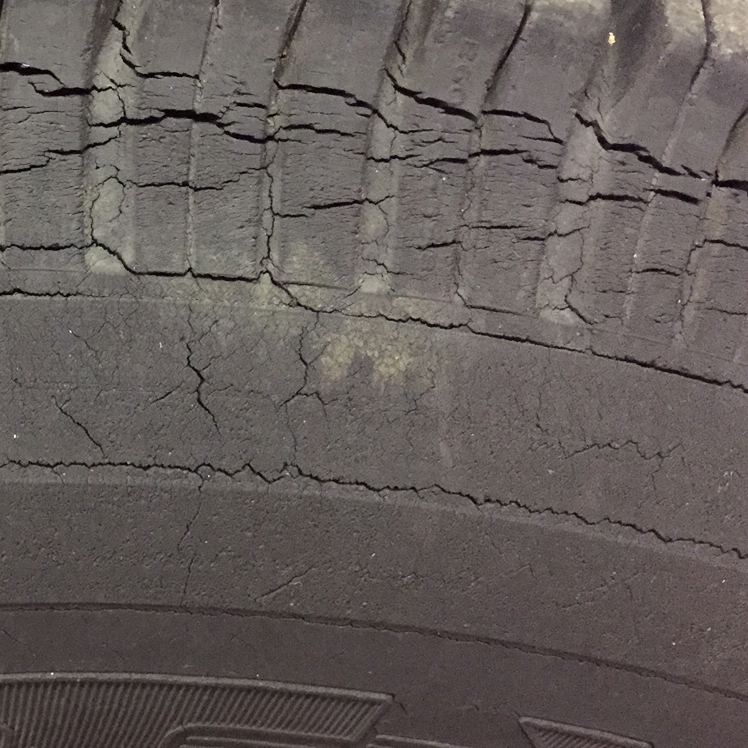

In [8]:
import PIL
from PIL import Image
from IPython.display import display

# Tentukan jalur gambar
path_to_image = '/content/Digital images of defective and good condition tyres/defective/Defective (1).jpg'

# Buka gambar menggunakan PIL
image = Image.open(path_to_image)

# Menampilkan gambar
display(image)

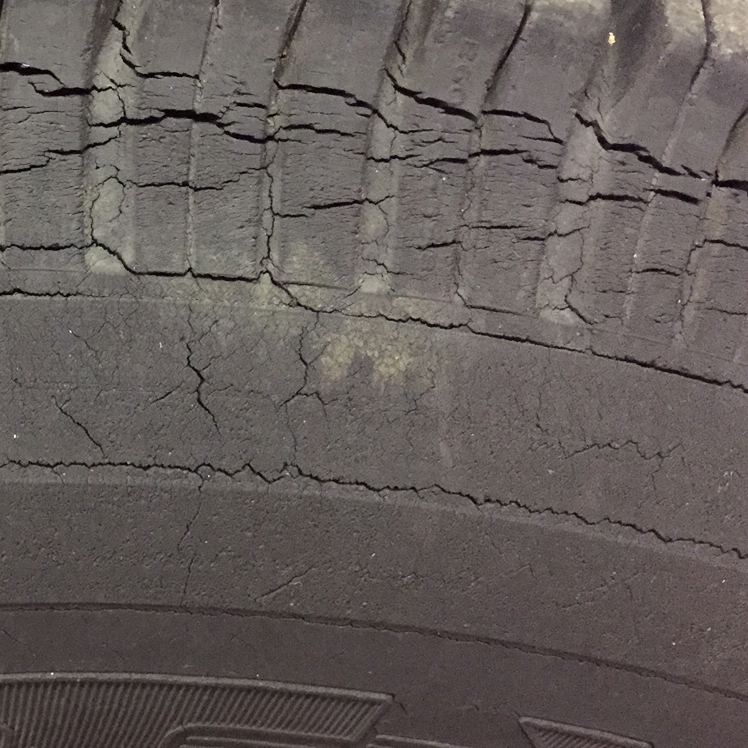

In [9]:
from PIL import Image
from IPython.display import display

# Tentukan jalur gambar
path_to_image = '/content/Digital images of defective and good condition tyres/defective/Defective (1).jpg'

# Buka gambar menggunakan PIL
image = Image.open(path_to_image)

# Menampilkan gambar
display(image)

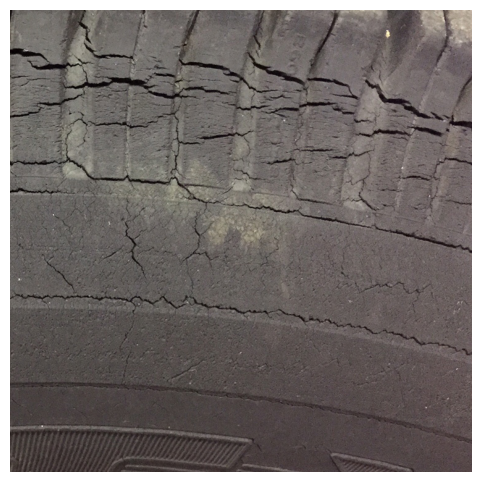

In [10]:
import matplotlib.image as mpimg

# Tentukan jalur gambar
path_to_image = '/content/Digital images of defective and good condition tyres/defective/Defective (1).jpg'

# Buka dan tampilkan gambar menggunakan Matplotlib
img = mpimg.imread(path_to_image)
plt.figure(figsize=(6, 6))  # Tentukan ukuran gambar
plt.imshow(img)
plt.axis('off')  # Untuk menyembunyikan sumbu
plt.show()

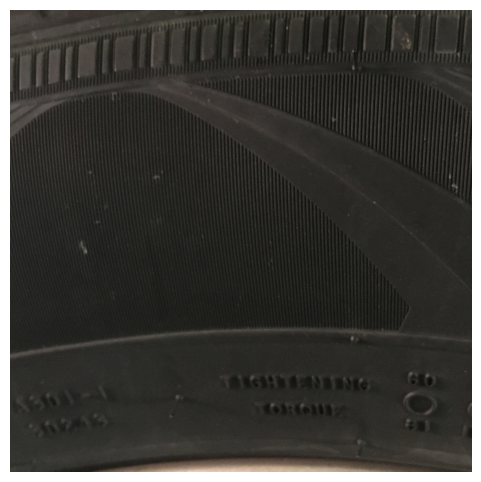

In [12]:


# Tentukan jalur gambar
path_to_image = '/content/Digital images of defective and good condition tyres/good/good (1).jpg'

# Buka dan tampilkan gambar menggunakan Matplotlib
img = mpimg.imread(path_to_image)
plt.figure(figsize=(6, 6))  # Tentukan ukuran gambar
plt.imshow(img)
plt.axis('off')  # Untuk menyembunyikan sumbu
plt.show()

In [13]:
from tensorflow.keras.applications import InceptionV3

In [86]:
base_model = InceptionV3(input_shape=(224,224,3),weights='imagenet', include_top=False)

In [87]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [88]:
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generator untuk data latih dengan augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1)
# Data generator untuk data validasi tanpa augmentasi
validation_datagen = ImageDataGenerator(rescale=1./255,
                                        validation_split=0.1)  # Data validasi tidak perlu augmentasi
# Buat generator data latih
train_generator = train_datagen.flow_from_directory(
    data,  # direktori data latih
    target_size=(224, 224),
    shuffle=True,
    class_mode='binary',
    subset='training')
# Buat generator data validasi
validation_generator = validation_datagen.flow_from_directory(
    data,  # direktori data validasi
    target_size=(224, 224),
    class_mode='binary',
    subset='validation')
# Kemudian Anda dapat menggunakan generator ini dalam model Anda

Found 1672 images belonging to 2 classes.
Found 184 images belonging to 2 classes.


In [90]:
print("Kelas dari train_generator:")
print(train_generator.class_indices)

# Mencetak kelas dari validation_generator
print("Kelas dari validation_generator:")
print(validation_generator.class_indices)

Kelas dari train_generator:
{'defective': 0, 'good': 1}
Kelas dari validation_generator:
{'defective': 0, 'good': 1}


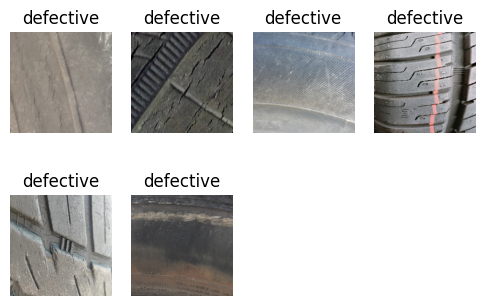

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

# Mengambil satu batch gambar dari train_generator
images, labels = next(train_generator)
for i in range(6):  # Mengambil 12 gambar dari batch
    ax = plt.subplot(3, 4, i + 1)  # Menggunakan grid 3x4 untuk 12 gambar
    plt.imshow(images[i])
    class_index = labels[i].argmax()  # Mengambil indeks kelas dari one-hot encoding
    class_name = list(train_generator.class_indices.keys())[class_index]
    plt.title(class_name)
    plt.axis("off")

plt.show()

In [92]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

In [103]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('accuracy') > 0.91 and logs.get('val_accuracy') > 0.90):
                print("\n Accuracy telah mencapai 97% atau lebih, menghentikan pelatihan ")
                self.model.stop_training = True

callback = myCallback()

In [104]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [105]:
history = model.fit(
          train_generator,
          epochs=50,
          steps_per_epoch=16,
          validation_data=validation_generator,
          validation_steps=5,
          verbose=2,
          callbacks=[callback])

Epoch 1/50
16/16 - 36s - loss: 0.3453 - accuracy: 0.9043 - val_loss: 0.5439 - val_accuracy: 0.8000 - 36s/epoch - 2s/step
Epoch 2/50
16/16 - 29s - loss: 0.2992 - accuracy: 0.9219 - val_loss: 0.4274 - val_accuracy: 0.8938 - 29s/epoch - 2s/step
Epoch 3/50

 Accuracy telah mencapai 97% atau lebih, menghentikan pelatihan 
16/16 - 32s - loss: 0.2913 - accuracy: 0.9258 - val_loss: 0.3933 - val_accuracy: 0.9125 - 32s/epoch - 2s/step


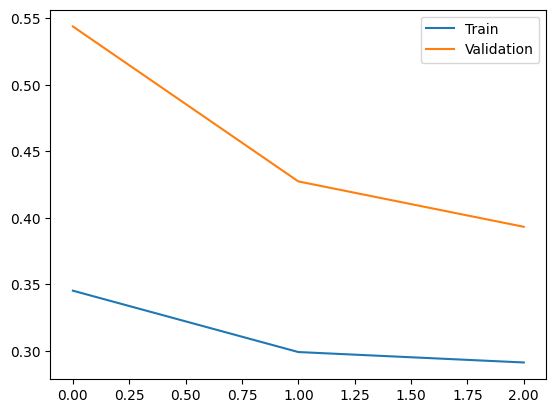

In [106]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Validation')
plt.legend()

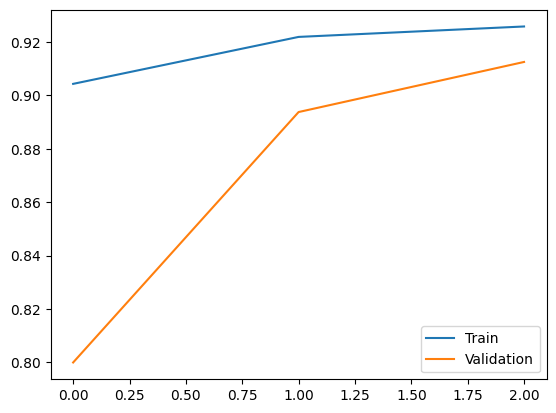

In [107]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()